# Import Libraries and Load Data

In [89]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_excel('Copy of data(1).xlsx')

# Data Preprocessing
**Train-Test Split and Data Standardization**

In [91]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if necessary (depending on the analysis)
# data.fillna(method='ffill', inplace=True)

# Separate features and target variable
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


# Model Selection

In [107]:
# Import machine learning models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True)

# Train models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Model Evaluation

In [28]:
# Evaluate Logistic Regression
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_log_reg))
print("AUC-ROC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

# Evaluate Random Forest
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))

# Evaluate KNN
print("K-Nearest Neighbors Performance")
print(classification_report(y_test, y_pred_knn))
print("AUC-ROC:", roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1]))

# Evaluate SVM
print("SVM Performance")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.50      0.15      0.24        78

    accuracy                           0.96      2046
   macro avg       0.73      0.57      0.61      2046
weighted avg       0.95      0.96      0.95      2046

AUC-ROC: 0.9005302793412551
Random Forest Performance
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.75      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.86      0.56      0.59      2046
weighted avg       0.96      0.96      0.95      2046

AUC-ROC: 0.9107938555347094
K-Nearest Neighbors Performance
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.48      0.13      0.20        78

    accuracy                        

# RandomForest for Feature Importance

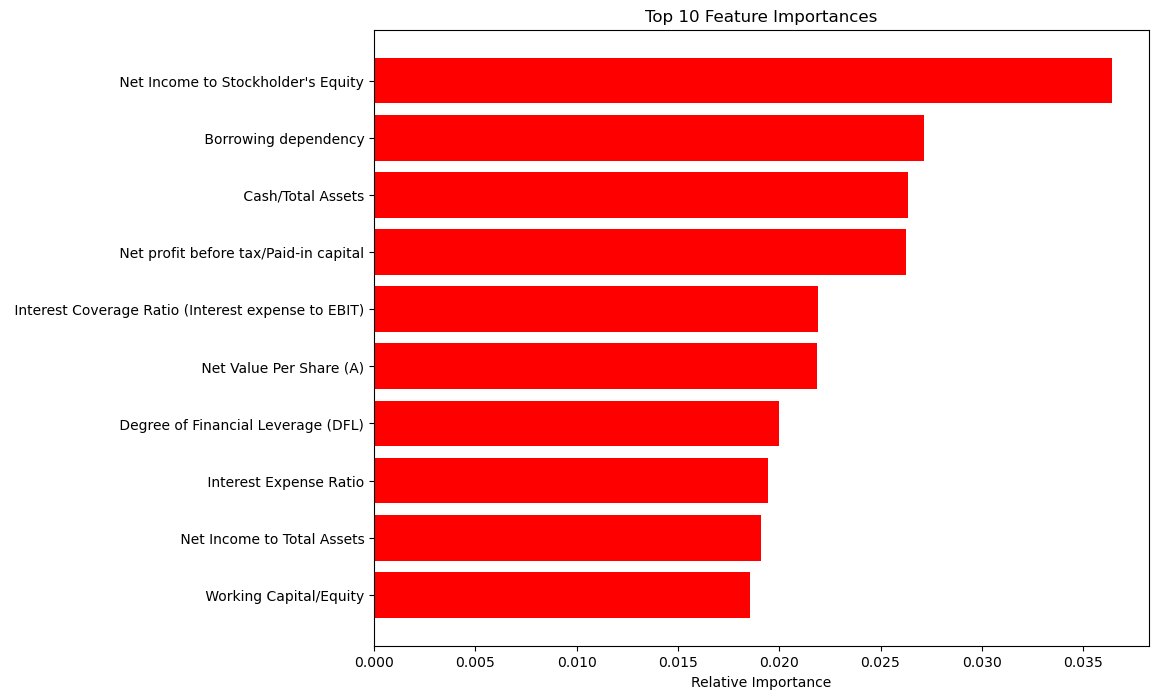

In [93]:
# RandomForest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature importance plot (Top 10 features)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Logistic Regression and ROC Curve

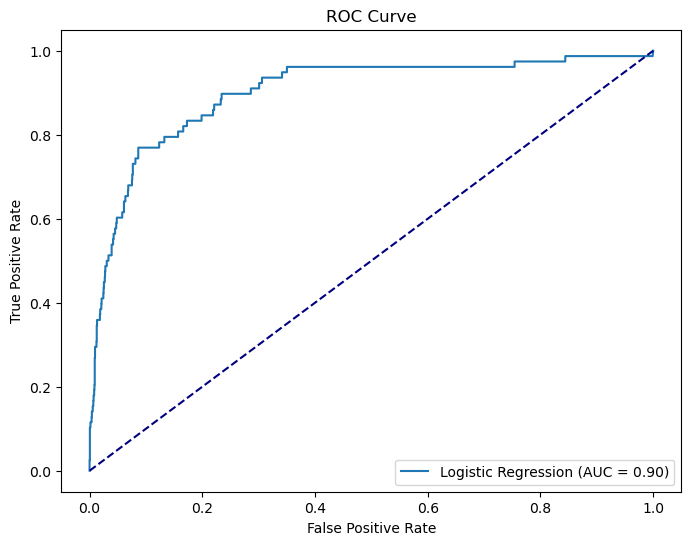

In [95]:
# Logistic Regression for ROC Curve
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# MLP Classifier and Loss Curve

In [97]:
# MLP (Neural Network) for training and loss curves
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Plot loss curve
plt.plot(mlp.loss_curve_)
plt.title('MLP Classifier Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Random Forest Classifier

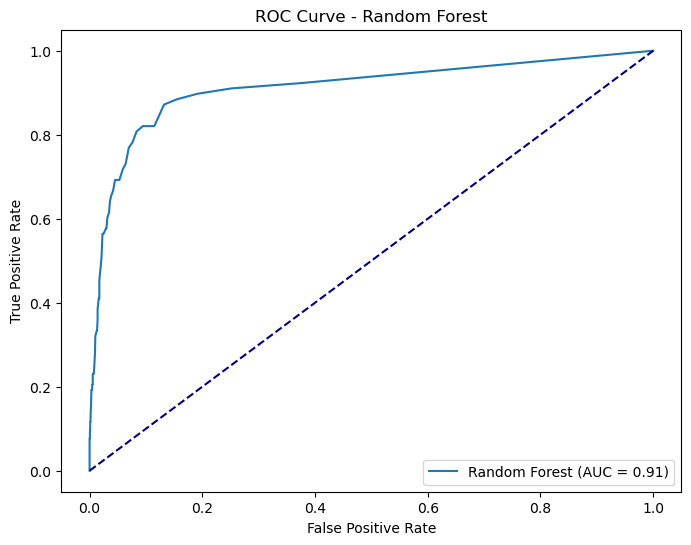

In [99]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf_prob = random_forest.predict_proba(X_test_scaled)[:, 1]

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve Comparison (Logistic Regression, KNN, SVM, and Random Forest)

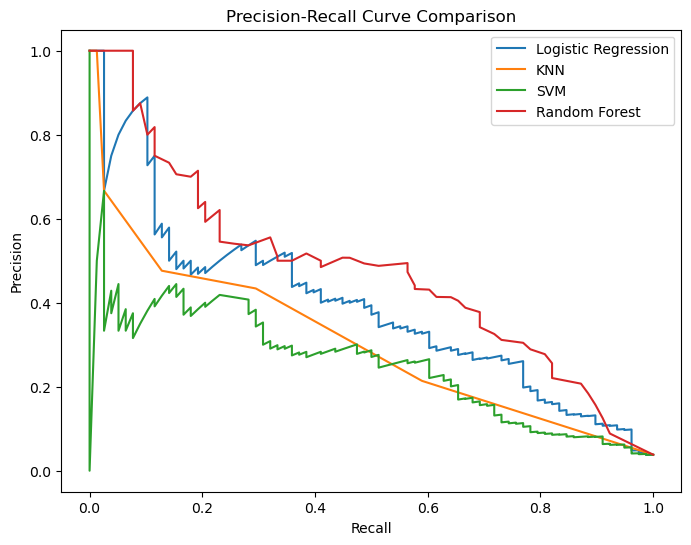

In [109]:
from sklearn.metrics import precision_recall_curve

# Logistic Regression Probabilities
y_pred_lr_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# KNN Probabilities
y_pred_knn_prob = knn.predict_proba(X_test_scaled)[:, 1]

# SVM Probabilities
y_pred_svm_prob = svm.decision_function(X_test_scaled)

# Random Forest Probabilities (already defined in previous step)
y_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]

# Precision-Recall Curves
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_lr_prob)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn_prob)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_svm_prob)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf_prob)

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.plot(recall_svm, precision_svm, label='SVM')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix and Classification Report

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.50      0.15      0.24        78

    accuracy                           0.96      2046
   macro avg       0.73      0.57      0.61      2046
weighted avg       0.95      0.96      0.95      2046

------------------------------------------------------------


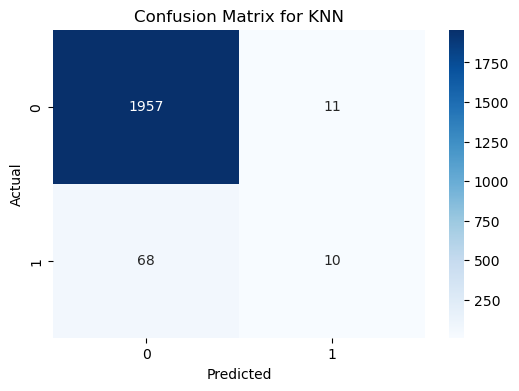

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.48      0.13      0.20        78

    accuracy                           0.96      2046
   macro avg       0.72      0.56      0.59      2046
weighted avg       0.95      0.96      0.95      2046

------------------------------------------------------------


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       0.00      0.00      0.00        78

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.94      2046

------------------------------------------------------------


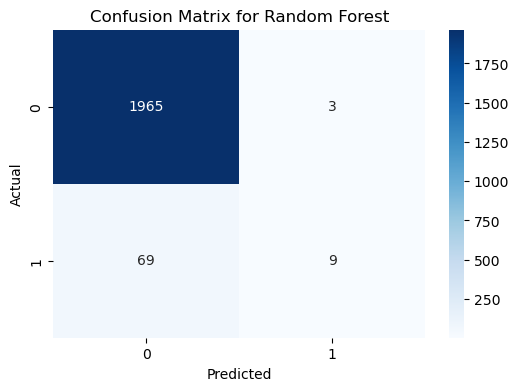

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.75      0.12      0.20        78

    accuracy                           0.96      2046
   macro avg       0.86      0.56      0.59      2046
weighted avg       0.96      0.96      0.95      2046

------------------------------------------------------------


In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# List of models and their names
models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svm,
    'Random Forest': rf
}

# Iterate through each model and plot the Confusion Matrix and Classification Report
for name, model in models.items():
    # Predict labels
    y_pred = model.predict(X_test_scaled)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix using seaborn heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Classification Report
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))
    print('-' * 60)